In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO

# Load a pretrained ResNet-18 model
model = models.resnet18(pretrained=True)

# Set the model to evaluation mode (important for inference)
model.eval()

# Transform for preprocessing the input image (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize(256),                # Resize to 256x256
    transforms.CenterCrop(224),            # Crop to 224x224
    transforms.ToTensor(),                 # Convert to tensor
    transforms.Normalize(                  # Normalize according to ImageNet statistics
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Example: Load an image from URL
img_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Convert image to RGB to avoid issues with RGBA or grayscale images
img = img.convert("RGB")


# Apply the transformdsjd;ajsdljfkld;sjfdfgadsfssdafddsfsasg_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Move the image to the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
img_tensor = img_tensor.to(device)

# Perform the forward pass (inference)
with torch.no_grad():  # Disable gradient computation for inference
    output = model(img_tensor)

# The output is a tensor of class scores (for 1000 ImageNet classes)
# Get the predicted class index
_, predicted_class = torch.max(output, 1)

# Load class labels (ImageNet classes)
labels_url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
labels_response = requests.get(labels_url)
labels = labels_response.json()

# Get the human-readable label for the predicted class
predicted_label = labels[str(predicted_class.item())][1]
print(f"Predicted class: {predicted_label}")


Predicted class: saltshaker


In [61]:
backbone = models.resnet50(pretrained=True)
backbone = nn.Sequential(
    *list(backbone.children())[:-2]  # Remove avg pool and fc
)

o = backbone(i.unsqueeze(0))
o.shape

c:\Users\bparaju\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bparaju\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 2048, 7, 7])

In [69]:
conv1 = nn.Conv2d(2048, 256, 1)

co = conv1(o)
co.shape

torch.Size([1, 256, 7, 7])

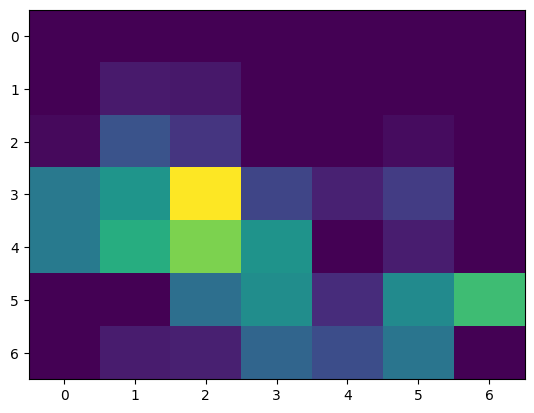

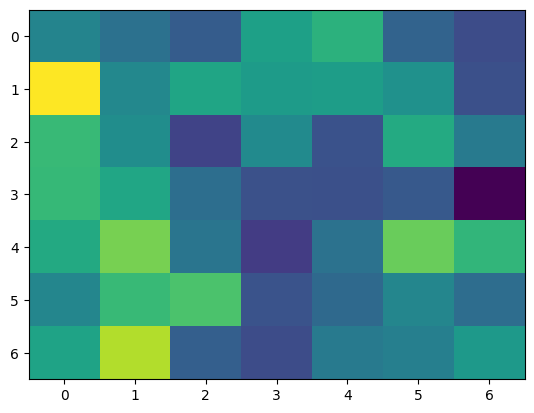

In [71]:
plt.imshow(o[0][4].detach().numpy(), aspect='auto')
plt.figure()
plt.imshow(co[0][4].detach().numpy(), aspect='auto')

In [77]:
encoderLayer = nn.TransformerEncoderLayer(256,nhead=8)
encoder = nn.TransformerEncoder(encoder_layer=encoderLayer,num_layers=4)

einput = co.view(1,256,49)

encoder(einput.permute(2,0,1)).shape

c:\Users\bparaju\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


torch.Size([49, 1, 256])

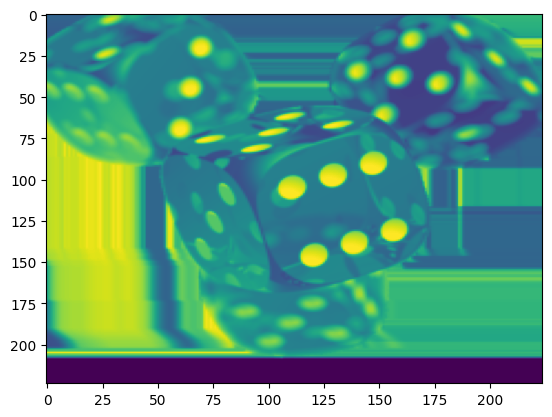

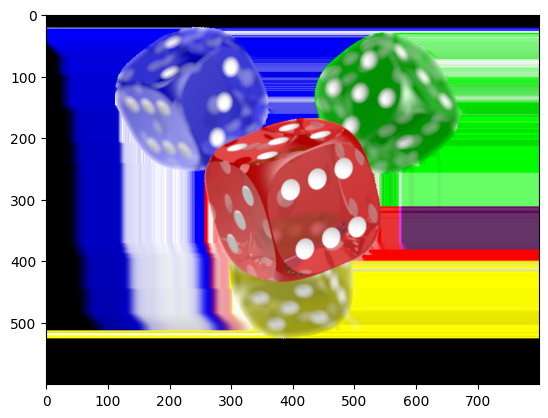

In [16]:
import numpy as np
import matplotlib.pyplot as plt
i = transform(transforms.ToTensor()(img))
plt.figure()
plt.imshow(i.sum(axis = 0), aspect='auto')
plt.figure()
plt.imshow(img)


In [13]:
import matplotlib.pyplot as plt
Image.open(transform(img))
# plt.imshow(img)
# plt.imshow(transform(img))

TypeError: img should be Tensor Image. Got <class 'PIL.Image.Image'>